In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [62]:
import requests
from config import weather_api_key

In [81]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "thompson"


In [82]:
query_url = url + "appid=" + weather_api_key + "&q=" + city

In [83]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [84]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [85]:
weather_json.get("main")

{'temp': 241.24,
 'feels_like': 234.24,
 'temp_min': 241.24,
 'temp_max': 241.24,
 'pressure': 1031,
 'humidity': 62}

In [30]:
# Create a set of random latitude and longitude coordinates.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [86]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


    

607

In [87]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + city.replace(" ","+")
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | sao jose da coroa grande
Processing Record 4 of Set 1 | odesskoye
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | amapa
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | armizonskoye
Processing Record 12 of Set 1 | tautira
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | prescott
Processing Record 15 of Set 1 | naze
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | sakakah
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | dauphin
Processing Record 21 of Set 1 | yunjinghong
City n

City not found. Skipping...
Processing Record 36 of Set 4 | songjianghe
Processing Record 37 of Set 4 | trat
Processing Record 38 of Set 4 | erbaa
Processing Record 39 of Set 4 | richards bay
Processing Record 40 of Set 4 | orlik
Processing Record 41 of Set 4 | mutsu
Processing Record 42 of Set 4 | gondanglegi
Processing Record 43 of Set 4 | yulara
Processing Record 44 of Set 4 | kahului
Processing Record 45 of Set 4 | hutchinson
Processing Record 46 of Set 4 | port-cartier
Processing Record 47 of Set 4 | malatya
Processing Record 48 of Set 4 | lewistown
Processing Record 49 of Set 4 | severnyy-kospashskiy
Processing Record 50 of Set 4 | norman wells
Processing Record 1 of Set 5 | boende
Processing Record 2 of Set 5 | calama
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | bud
Processing Record 5 of Set 5 | birjand
Processing Record 6 of Set 5 | mareeba
Processing Record 7 of Set 5 | altamira
Processing Record 8 of Set 5 | havelock
Processing Record 9 of Set 5 

Processing Record 23 of Set 8 | amarante do maranhao
Processing Record 24 of Set 8 | akyab
Processing Record 25 of Set 8 | chandur
Processing Record 26 of Set 8 | bargal
City not found. Skipping...
Processing Record 27 of Set 8 | san quintin
Processing Record 28 of Set 8 | kim
Processing Record 29 of Set 8 | fort nelson
Processing Record 30 of Set 8 | lompoc
Processing Record 31 of Set 8 | trelew
Processing Record 32 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 33 of Set 8 | abilene
Processing Record 34 of Set 8 | camopi
Processing Record 35 of Set 8 | morganton
Processing Record 36 of Set 8 | tula
Processing Record 37 of Set 8 | fortuna
Processing Record 38 of Set 8 | valkeala
Processing Record 39 of Set 8 | ebolowa
Processing Record 40 of Set 8 | makakilo city
Processing Record 41 of Set 8 | wukari
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | tame
Processing Record 44 of Set 8 | araguaina
Processing Record 45 of Set 8 | nov

Processing Record 15 of Set 12 | suraabad
Processing Record 16 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 12 | baculin
Processing Record 18 of Set 12 | nassau
Processing Record 19 of Set 12 | pangai
Processing Record 20 of Set 12 | storm lake
Processing Record 21 of Set 12 | grand centre
City not found. Skipping...
Processing Record 22 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 23 of Set 12 | rocha
Processing Record 24 of Set 12 | sangar
Processing Record 25 of Set 12 | north bend
Processing Record 26 of Set 12 | arman
Processing Record 27 of Set 12 | port blair
Processing Record 28 of Set 12 | vostok
Processing Record 29 of Set 12 | zhigansk
Processing Record 30 of Set 12 | peniche
Processing Record 31 of Set 12 | opuwo
Processing Record 32 of Set 12 | alugan
Processing Record 33 of Set 12 | pedernales
Processing Record 34 of Set 12 | lamar
Processing Record 35 of Set 12 | isangel
Processing Record 36 of Set 12 | ewo
Processing

Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [93]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2022-02-11 17:29:32,73.5069,80.5464,258.16,90,100,11.91
1,Thompson,CA,2022-02-11 17:26:33,55.7435,-97.8558,241.24,62,0,3.09
2,Sao Jose Da Coroa Grande,BR,2022-02-11 17:34:20,-8.8978,-35.1478,303.24,56,74,6.15
3,Odesskoye,RU,2022-02-11 17:34:20,54.2111,72.9651,249.46,98,7,5.16
4,Port Lincoln,AU,2022-02-11 17:33:23,-34.7333,135.8667,290.37,78,0,6.19
5,Amapa,BR,2022-02-11 17:34:21,1.0000,-52.0000,301.05,76,89,1.31
6,Vaini,TO,2022-02-11 17:34:21,-21.2000,-175.2000,299.24,94,40,2.06
7,Tasiilaq,GL,2022-02-11 17:34:22,65.6145,-37.6368,264.24,59,100,2.45
8,Ushuaia,AR,2022-02-11 17:34:22,-54.8000,-68.3000,285.94,66,40,13.38
9,Armizonskoye,RU,2022-02-11 17:34:23,55.9461,67.6736,256.01,86,100,8.60


In [96]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [97]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

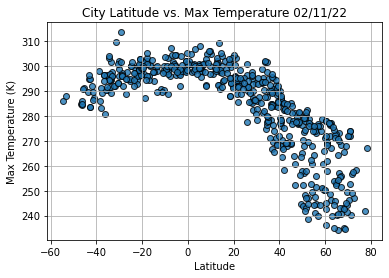

In [100]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (K)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

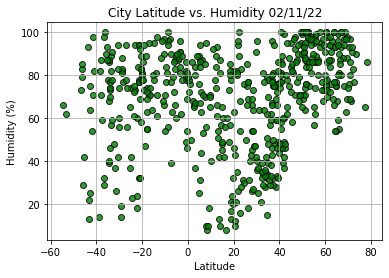

In [103]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", color = "green", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig2.png")

# Show plot.
plt.show()

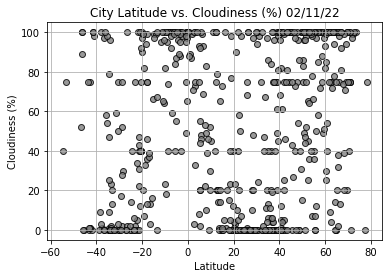

In [105]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", color = "grey", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

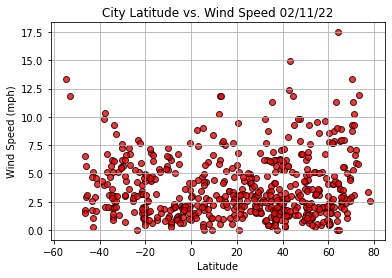

In [106]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", color = "red", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()